In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

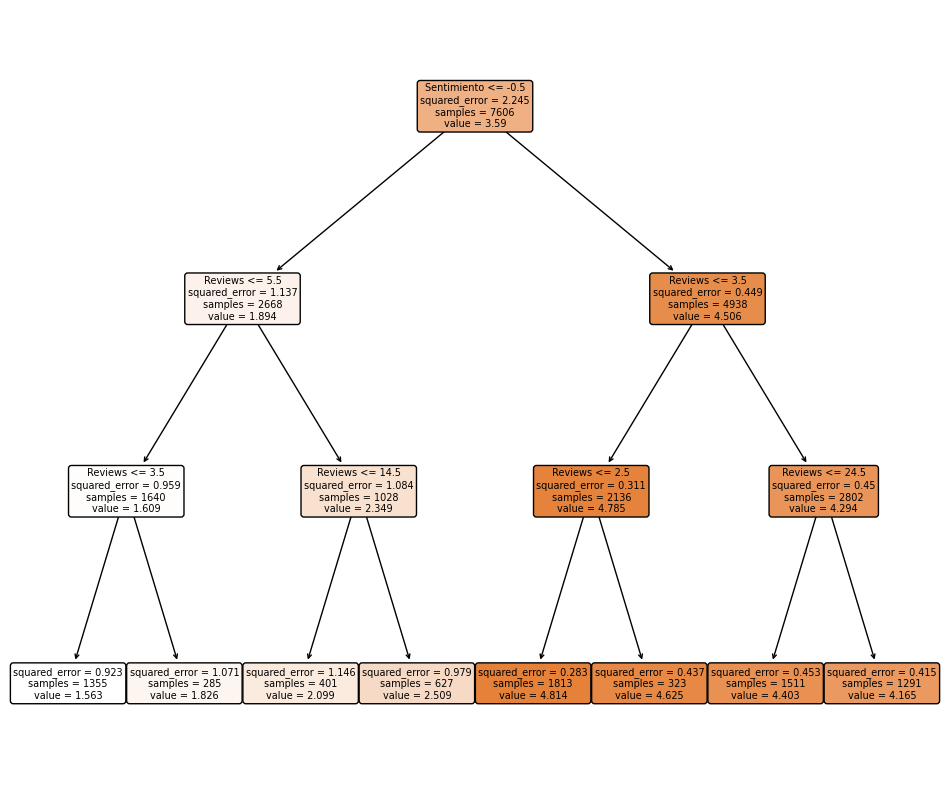

In [2]:
# Cargamos el conjunto de datos procesados
datos_procesados = pd.read_csv('datos_procesados_llamas.csv', sep=';')

# Seleccionamos las características (X) y la variable objetivo (y)
X = datos_procesados[['Reviews', 'Followers', 'Sentimiento']]
y = datos_procesados['Rating']

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Creamos un modelo de árbol de regresión
modelo_arbol_regresion = DecisionTreeRegressor(max_depth=3, min_samples_leaf=100)

# Entrenamos el modelo con los datos de entrenamiento
modelo_arbol_regresion.fit(X_train, y_train)

# Visualizamos el árbol
plt.figure(figsize=(12, 10))
plot_tree(modelo_arbol_regresion, feature_names=['Reviews', 'Followers', 'Sentimiento'], filled=True, rounded=True)
plt.show()

In [3]:
# Realizamos predicciones en el conjunto de prueba
predicciones = modelo_arbol_regresion.predict(X_test)

# Calculamos el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, predicciones)
print(f'Error Absoluto Medio (MAE): {mae}')

# Calculamos el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, predicciones)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calculamos la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

Error Absoluto Medio (MAE): 0.6040588304230262
Error Cuadrático Medio (MSE): 0.6343705943229971
Raíz del Error Cuadrático Medio (RMSE): 0.7964738503698644


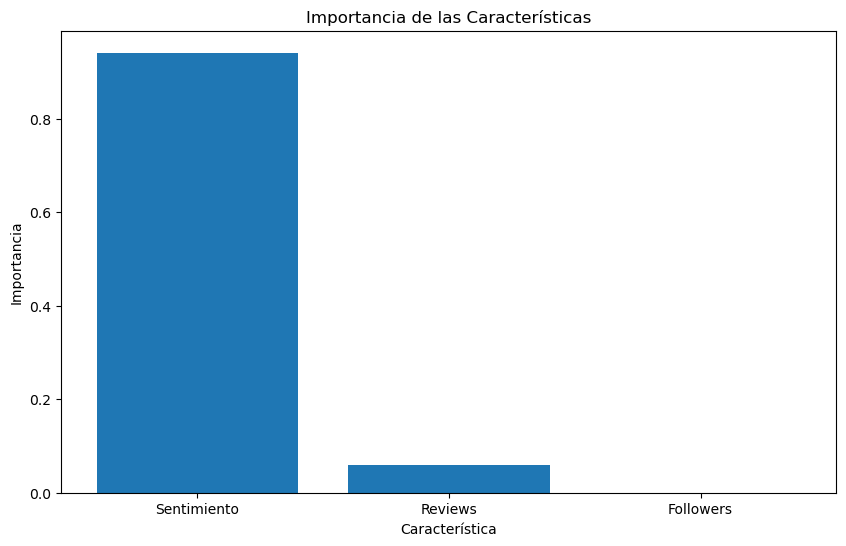

In [4]:
# Realizamos un estudio de la importancia de las características:
# Recordemos que en nuestro caso, la importancia de cada caraterística indica la proporción de reducción 
# de la suma de los residuos que se debe a cada característica, lo que permite identificar qué características
# son más influyentes en el rendimiento del modelo.

importancias_caracteristicas = modelo_arbol_regresion.feature_importances_

# Asociamos las importancias a los nombres de las variables y creamos un gráfico de barras para visualizar los resultados.
nombres_caracteristicas = X.columns
importancias_df = pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': importancias_caracteristicas})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(importancias_df['Característica'], importancias_df['Importancia'])
plt.title('Importancia de las Características')
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.show()
